In [1]:
# Make figures used in Tsutsui (2020, GRL)

In [2]:
import numpy as np
import pandas as pd
from mce.script.diag_result import DiagResult
from plotfunc import plot_fitting, plot_tcr_ecs, plot_parms_rel, plot_rwf_ramp

In [3]:
obj = DiagResult(dataroot='../mce/data')

In [4]:
parms_all = pd.concat(
    [obj.get_irm_parms(mip) for mip in ['CMIP5', 'CMIP6']], sort=False)

[2020-03-28 21:43:54 io] INFO:reading ../mce/data/parms/parms_irm-3_rtnt-tas_cmip5.nc
[2020-03-28 21:43:54 io] INFO:reading ../mce/data/parms/parms_irm-3_rtnt-tas_cmip6.nc


In [5]:
parms_g = parms_all.groupby('mip')
parms_g.groups['CMIP5']

Index(['ACCESS1.0', 'ACCESS1.3', 'BCC-CSM1.1', 'BNU-ESM', 'CanESM2', 'CCSM4',
       'CNRM-CM5', 'CSIRO-Mk3.6.0', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G',
       'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-ES', 'INM-CM4',
       'IPSL-CM5A-LR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC5', 'MPI-ESM-LR',
       'MPI-ESM-MR', 'MPI-ESM-P', 'MRI-CGCM3', 'NorESM1-M'],
      dtype='object', name='dataset')

In [6]:
parms_g.groups['CMIP6']

Index(['BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'E3SM-1-0', 'EC-Earth3-Veg',
       'GFDL-CM4', 'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL',
       'IPSL-CM6A-LR', 'MIROC-ES2L', 'MIROC6', 'MRI-ESM2-0', 'NESM3',
       'NorESM2-LM', 'SAM0-UNICON', 'UKESM1-0-LL'],
      dtype='object', name='dataset')

In [7]:
parms_g.mean().T

mip,CMIP5,CMIP6
a0,0.264269,0.238018
a1,0.336248,0.346841
a2,0.399483,0.415141
alpha,4.717061,4.617508
beta,1.064268,1.098355
ecs,3.098743,3.650188
ecs_reg,3.289876,3.994118
lambda,1.112338,0.947335
lambda_reg,1.103207,0.965241
tau0,0.975863,0.928618


[2020-03-28 21:43:54 io] INFO:reading ../mce/data/preproc2/rtnt_IPSL-CM6A-LR_abrupt-4xCO2_anom.nc
[2020-03-28 21:43:54 io] INFO:reading ../mce/data/preproc2/rtnt_IPSL-CM6A-LR_1pctCO2_anom.nc
[2020-03-28 21:43:54 io] INFO:reading ../mce/data/preproc2/tas_IPSL-CM6A-LR_abrupt-4xCO2_anom.nc
[2020-03-28 21:43:54 io] INFO:reading ../mce/data/preproc2/tas_IPSL-CM6A-LR_1pctCO2_anom.nc


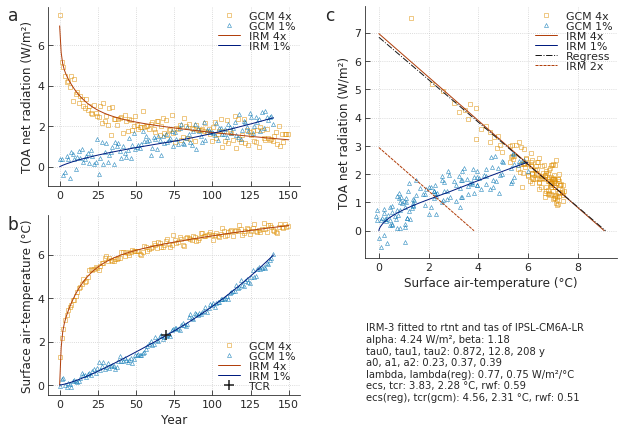

In [8]:
# Figure 1
dataset = 'IPSL-CM6A-LR'
parms = parms_all.drop('mip', axis=1).loc[dataset]
gcm = obj.get_gcm(dataset)
forcing, irm, ecs, tcr = obj.get_irm(parms)
names = {'var_n': obj.var_n, 'var_t': obj.var_t, 'dataset': dataset}
p1 = plot_fitting(gcm, forcing, irm, names, parms.to_dict())

**Figure 1.** Example of time series fitting of the top-of-atmosphere energy imbalance ($N$, **a**) and surface temperature anomaly ($T_{\mathrm{S}}$, **b**), and the resulting $N$-$T_{\mathrm{S}}$ relationship (**c**) for IPSL-CM6A-LR. The model output of the instantaneous quadrupling and 1%-per-year CO<sub>2</sub> increase experiments are labeled "GCM 4x" and "GCM 1%"; corresponding impulse response model emulations are labeled "IRM 4x" and "IRM 1%." The "IRM 2x" line is a reduced one from "IRM 4x" by a factor of $1/(2\beta)$. The line labeled "regress" is given by the conventional regression method.

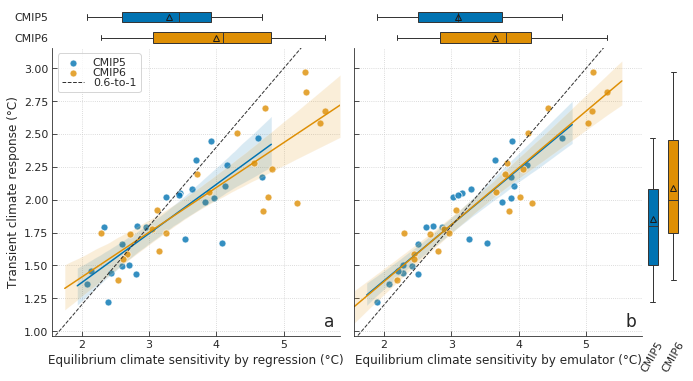

In [9]:
# Figure 2
p1 = plot_tcr_ecs(parms_all)

**Figure 2.** Relationship between the TCR and the ECS from the CMIP5 and CMIP6 multimodel ensembles. The ECS estimates are shown for the regression method (**a**) and the emulator method (**b**). The dashed line is drawn to guide a proportional relation with a ratio of 0.6, representing an approximate multimodel mean. The color lines with plumes show regression estimates with a 95% confidence interval. The triangle markers in the marginal box plots indicate means.

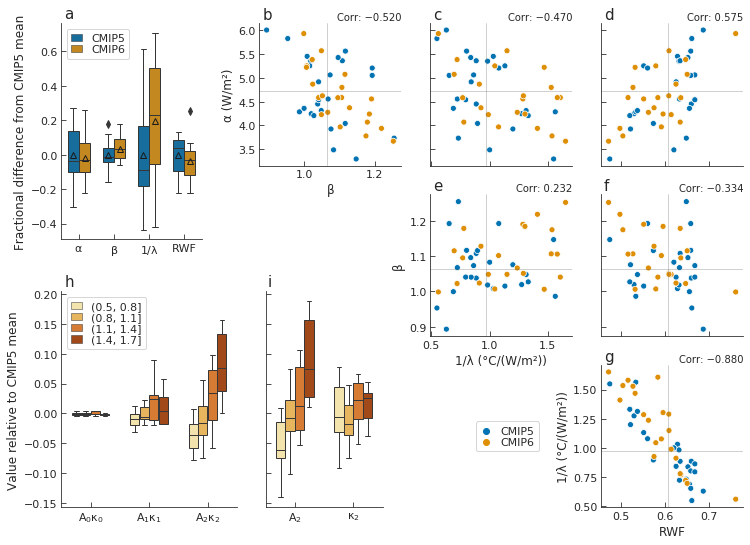

In [10]:
# Figure 3
p1 = plot_parms_rel(parms_all)

**Figure 3.** Distributions of the parameter values for forcing scale and amplification ($\alpha$ and $\beta$), feedback strength ($1/\lambda$), and ocean mixing ($\mathrm{RWF}_{\mathrm{2x}}$, labeled "RWF").
(**a**) Fractional differences from the CMIP5 means as reference, defined as $x/\mathrm{mean}(x)-1$. The triangle markers point multimodel means.
(**b** to **g**) Scatterplots for each pair of the four parameters. The text at the upper right corner describes the correlation coefficient of the selected pair. The horizontal and vertical lines indicate the reference values.
(**h**) Components of a yet to be realized warming fraction ($A_{\mathrm{S}i} \kappa_{i}$, labeled "$A_{0} \kappa_{0}$," "$A_{1} \kappa_{1}$," and "$A_{2} \kappa_{2}$") in ascending order in terms of time constant length.
(**i**) Factors associated with the longest time constant component, $A_{\mathrm{S}2}$ and $\kappa_{2}$.
Distributions are shown for each ensemble in panels **a** to **g**, and for feedback strength classes in panels **h** and **i**. The legend in panel **h** describes the ranges of the feedback strength classes in ${}^{\circ}\mathrm{C}/(\mathrm{W}/\mathrm{m}^{2})$. Outliers, which are outside of the 1.5-times interquartile range from the first/third quartile, are omitted in panels **h** and **i**.

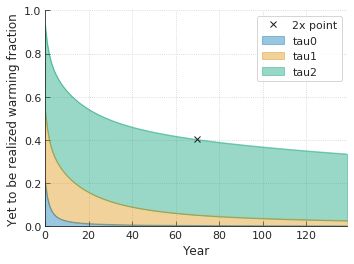

In [11]:
# Figure S2
names_a = ['a{}'.format(i) for i in range(obj.nl)]
names_tau = ['tau{}'.format(i) for i in range(obj.nl)]
map_a = dict([x[::-1] for x in enumerate(names_a)])
map_tau = dict([x[::-1] for x in enumerate(names_tau)])
asj = parms_all[names_a].rename(map_a, axis=1)
tauj = parms_all[names_tau].rename(map_tau, axis=1)

asj = asj.groupby(parms_all['mip']).mean().loc['CMIP5']
asj = asj.div(asj.sum()).values
tauj = tauj.groupby(parms_all['mip']).mean().loc['CMIP5'].values

p1 = plot_rwf_ramp(asj, tauj)

**Figure S2.** Yet to be realized warming fractions in a 1%-per-year CO<sub>2</sub> increase, assuming $\beta=1$, with the CMIP5-mean response parameters for the contributions of three separate time constants labeled "tau0", "tau1", "tau2" in ascending order of their lengths. The cross marker points the total fraction at the time when the CO<sub>2</sub> concentration reaches a doubling level.